In [1]:
#Set Directory
import os 
os.chdir('C:\\Users\\jason\\OneDrive\\Desktop\\NCU\\8535_Univariate Analysis\\Week 7')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import style,rcParams
style.use('seaborn-white')
rcParams['figure.figsize'] = 10,5
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix,plot_confusion_matrix,roc_curve,classification_report
from scikitplot.metrics import plot_confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jason\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jason\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
#Read Dataset
df_raw= pd.read_csv(r"C:\Users\jason\OneDrive\Desktop\NCU\8535_Univariate Analysis\Week 7\emotions.csv")

In [4]:
#Add column names

df_raw.columns =['Comments', 'Label']

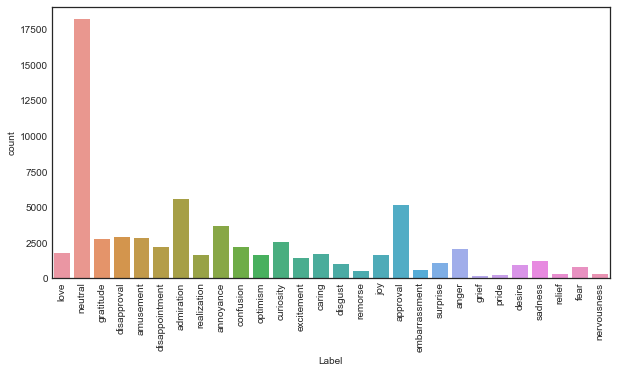

In [5]:
# View distribution of sentiment by labels.
sns.countplot(df_raw.Label)
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
plt.show()

In [14]:
# Create function to encode sentiment labels to fit binary class (positive=1, negative=0)
def custom_encoder(df):
    df_raw.replace(to_replace ="admiration", value =1, inplace=True)
    df_raw.replace(to_replace ="amusement", value =1, inplace=True)
    df_raw.replace(to_replace ="approval", value =1, inplace=True)
    df_raw.replace(to_replace ="caring", value =1, inplace=True)
    df_raw.replace(to_replace ="desire", value =1, inplace=True)
    df_raw.replace(to_replace ="excitement", value =1, inplace=True)
    df_raw.replace(to_replace ="gratitude", value =1, inplace=True)
    df_raw.replace(to_replace ="joy", value =1, inplace=True)
    df_raw.replace(to_replace ="love", value =1, inplace=True)
    df_raw.replace(to_replace ="optimism", value =1, inplace=True)
    df_raw.replace(to_replace ="relief", value =1, inplace=True)
    df_raw.replace(to_replace ="surprise", value =1, inplace=True)
    df_raw.replace(to_replace ="relief", value =1, inplace=True)
    df_raw.replace(to_replace ="surprise", value =1, inplace=True)
    df_raw.replace(to_replace ="pride", value =1, inplace=True)
    df_raw.replace(to_replace ="anger", value =0, inplace=True)
    df_raw.replace(to_replace ="annoyance", value =0, inplace=True)
    df_raw.replace(to_replace ="disappointment", value =0, inplace=True)
    df_raw.replace(to_replace ="disapproval", value =0, inplace=True)
    df_raw.replace(to_replace ="disgust", value =0, inplace=True)
    df_raw.replace(to_replace ="embarrassment", value =0, inplace=True)
    df_raw.replace(to_replace ="fear", value =0, inplace=True)
    df_raw.replace(to_replace ="grief", value =0, inplace=True)
    df_raw.replace(to_replace ="nervousness", value =0, inplace=True)
    df_raw.replace(to_replace ="remorse", value =0, inplace=True)
    df_raw.replace(to_replace ="sadness", value =0, inplace=True)
    df_raw.replace(to_replace ="confusion", value =2, inplace=True)
    df_raw.replace(to_replace ="curiosity", value =2, inplace=True)
    df_raw.replace(to_replace ="neutral", value =2, inplace=True)
    df_raw.replace(to_replace ="realization", value =2, inplace=True)

In [15]:
#Remove neutral or '2' lables
df = df_raw[df_raw['Label'] != 2] 

In [16]:
# Execute custom encoder function against the dataset.
custom_encoder(df['Label'])

In [79]:
df['Label'].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='Label', ylabel='count'>

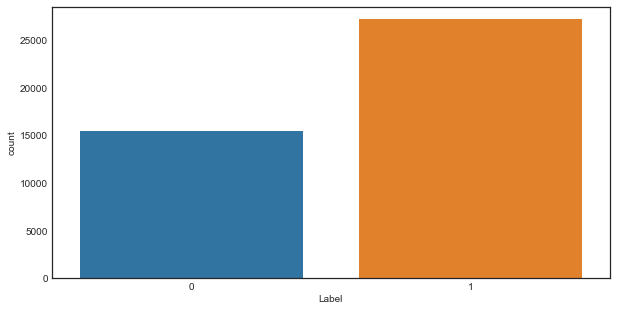

In [80]:
# Result is a dataset with a binary class label.
sns.countplot(df.Label)

In [207]:
df.Label[df.Label == 1].count()

27150

In [19]:
# Create a WordNetLemmatizer
lm = WordNetLemmatizer()

In [20]:
# Create a function to transform the data as follows:

def text_transformation(df_col):
    corpus = []
    for item in df_col:
       # remove punctuation characters.
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        # convert to lower case.
        new_item = new_item.lower()
        new_item = new_item.split()
        # lemmatize and remove stop words.
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        # append to corpus and return as a transformed corpus.
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [21]:
# Assign transformed text to the corpus.
corpus = text_transformation(df['Comments'])

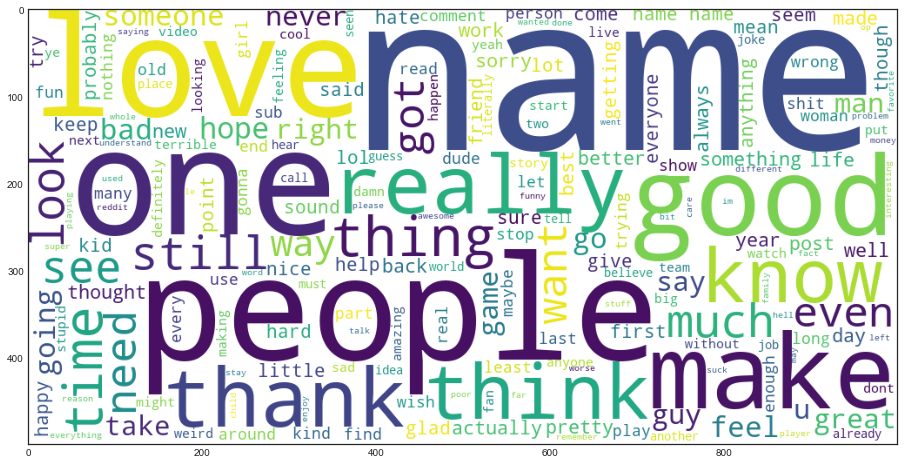

In [22]:
# Create a word cloud to show word density
rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)

wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

In [23]:
# Import CountVectorizer to crate a Bag of Words (BOW) model. 
# This assists in determining the number of times each word appears.
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
# Create a bigram with range (1,2) to permit dual word combinations
cv = CountVectorizer(ngram_range=(1,2))
data = cv.fit_transform(corpus)

In [25]:
# Assign X and y
X = data
y = df.Label

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

In [27]:
# Create a Logistic Regression Model.
model = LogisticRegression(max_iter = X_train.shape[1])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [28]:
## Logistic Regression Model Performance Evaluation
accuracy_score(y_test, y_pred) # 0.779800159497115



0.779800159497115

In [29]:
## Logistic Regression Model Performance Evaluation
f1_score(y_test, y_pred) # 0.8325485159817352

0.8325485159817352

In [165]:
#Create testing dataset
X_test1 = pd.DataFrame(X_test)
test_df = df.iloc[-len(X_test1):]

In [187]:
X_test,y_test = test_df.Comments,test_df.Label
#pre-processing of text
test_corpus = text_transformation(X_test)
#convert text data into vectors
testdata = cv.transform(test_corpus)
#predict the target
predictions = model.predict(testdata)

Accuracy_score:  0.8697752967115447
Precision_score:  0.8779123291551589
Recall_score:  0.9217785708974645
-------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.78      0.82      7868
           1       0.88      0.92      0.90     13449

    accuracy                           0.87     21317
   macro avg       0.87      0.85      0.86     21317
weighted avg       0.87      0.87      0.87     21317



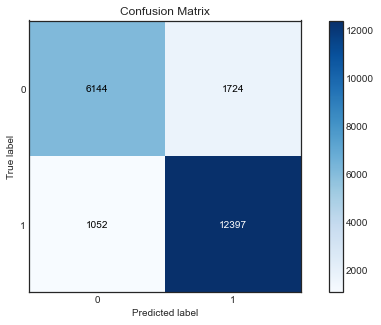

In [188]:
#Confusion Matrix for testing data
rcParams['figure.figsize'] = 10,5
plot_confusion_matrix(y_test,predictions)
acc_score = accuracy_score(y_test,predictions)
pre_score = precision_score(y_test,predictions)
rec_score = recall_score(y_test,predictions)
print('Accuracy_score: ',acc_score)
print('Precision_score: ',pre_score)
print('Recall_score: ',rec_score)
print('-------------------------------------------------------------------')
cr = classification_report(y_test,predictions)
print(cr)

In [189]:
predictions_probability = model.predict_proba(testdata)

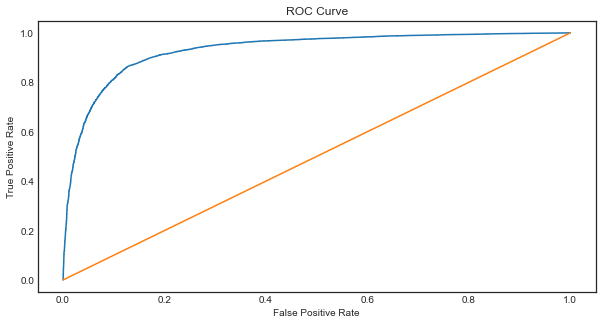

In [190]:
#ROC for testing dataset
fpr,tpr,thresholds = roc_curve(y_test,predictions_probability[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [192]:
def expression_check(prediction_input):
    if prediction_input == 0:
        print("Input statement has Negative Sentiment.")
    elif prediction_input == 1:
        print("Input statement has Positive Sentiment.")
    else:
        print("Invalid Statement.")

In [193]:
def sentiment_predictor(input):
    input = text_transformation(input)
    transformed_input = cv.transform(input)
    prediction = model.predict(transformed_input)
    expression_check(prediction)

In [218]:
input1 = ["I love this class"]
input2 = ["I think they should really try harder."]
input3 = ["That was disappointing"]
sentiment_predictor(input1)
sentiment_predictor(input2)
sentiment_predictor(input3)

Input statement has Positive Sentiment.
Input statement has Positive Sentiment.
Input statement has Negative Sentiment.
